<a href="https://colab.research.google.com/github/VaibhavBhusawale/Topic-Modeling-on-News-Articles/blob/main/Copy_of_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
#import libraries for topic modeling on news articles
import numpy as np
import pandas as pd
import scipy.stats as stats
import json
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import sklearn
import bokeh
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

#spacy for lemmatization
import spacy
import glob
import string
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# Plotting tools
!pip install pyLDAvis==3.2.1
import pyLDAvis
import pyLDAvis.gensim 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.7 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136187 sha256=98bca918c4823f825714acca4aef53fe9137f7cd068dbf9aea48020638d10ce4
  Stored in directory: /root/.cache/pip/wheels/c6/ee/a6/7c17a63623f940dff0b9cbd7e48a27543f088fa55a7d2b62d0
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path to the data
path = '/content/drive/MyDrive/Capstone_project_4_Topic_Modeling/bbc'

In [5]:
# Loading the data
News=[]
Type=[]
folders=["tech","sport","politics","entertainment","business"]
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file 
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)
      

data={'news':News,'type':Type}
df = pd.DataFrame(data)

In [6]:
df.head()

,news,type
0,b'Net fingerprints combat attacks\n\nEighty la...,tech
1,"b""Progress on new internet domains\n\nBy early...",tech
2,b'Peer-to-peer nets \'here to stay\'\n\nPeer-t...,tech
3,b'Tough rules for ringtone sellers\n\nFirms th...,tech
4,b'China \'ripe\' for media explosion\n\nAsia i...,tech


In [7]:
df.tail()

,news,type
2220,"b'Rover deal \'may cost 2,000 jobs\'\n\nSome 2...",business
2221,b'China keeps tight rein on credit\n\nChina\'s...,business
2222,b'Strong demand triggers oil rally\n\nCrude oi...,business
2223,"b""Pernod takeover talk lifts Domecq\n\nShares ...",business
2224,b'Japan narrowly escapes recession\n\nJapan\'s...,business


In [8]:
df.shape

(2225, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [10]:
#Checking null values in columns 
df.isnull().sum()

news    0
type    0
dtype: int64

In [11]:
#checking the Duplicate values
df.duplicated().sum()

98

In [12]:
# Drop Duplicates
df = df.drop_duplicates()

In [13]:
#checking the Duplicate values
df.duplicated().sum()

0

#**Basic Data Exploration**

In [14]:
print("NUMBER OF DATA POINTS -",df.shape[0])
print("NUMBER OF FEATURES -",df.shape[1])
print("FEATURES -",df.columns.values)

NUMBER OF DATA POINTS - 2127
NUMBER OF FEATURES - 2
FEATURES - ['news' 'type']


In [15]:
#finding no of articles w.r.t topics
df['type'].value_counts()

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: type, dtype: int64

In [16]:
# Converting column into astring
df['news'] = df['news'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


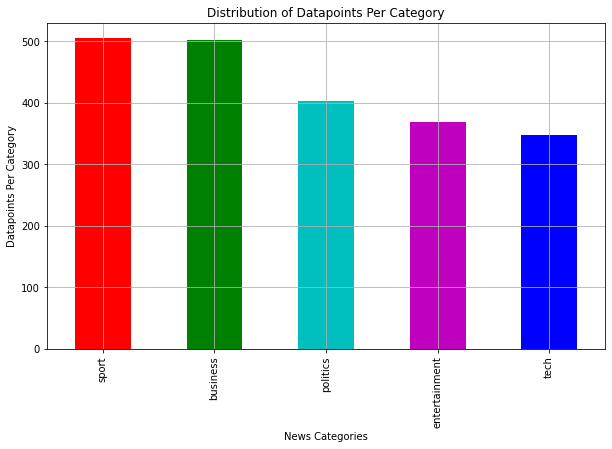

In [17]:
news_cat = df['type'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['r','g','c','m','b']
news_cat.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("News Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

In [18]:
X=list(df['news'])
X[:5]

['b\'Net fingerprints combat attacks\\n\\nEighty large net service firms have switched on software to spot and stop net attacks automatically.\\n\\nThe system creates digital fingerprints of ongoing incidents that are sent to every network affected. Firms involved in the smart sensing system believe it will help trace attacks back to their source. Data gathered will be passed to police to help build up intelligence about who is behind worm outbreaks and denial of service attacks.\\n\\nFirms signing up for the sensing system include MCI, BT, Deutsche Telekom, Energis, NTT, Bell Canada and many others. The creation of the fingerprinting system has been brokered by US firm Arbor Networks and signatures of attacks will be passed to anyone suffering under the weight of an attack. Increasingly computer criminals are using swarms of remotely controlled computers to carry out denial of service attacks on websites, launch worms and relay spam around the net. "We have seen attacks involving five

The news column contains the texts which require some preprocessing before further analysis. Preprocessing would involve steps like

Case conversion
Removal of special characters and numbers (if any)
Using the RE package this processing can be done easily. A convenient function can do preprocessing and, as the data contain news heading, the function will return both the heading as well as the actual news content from individual texts. The codes are given below:

In [19]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

stop_words =set(stopwords.words('english'))

def text_preprocrssing(total_news,index,column,data):
  if type(total_news) is not int:
    string = ""
    
    #replace with all special char_with space
    total_news =re.sub('[^a-zA-Z0-9\n]',' ',total_news)

    # replce multiple space with single space 
    total_news =re.sub('\s+',' ',total_news)

    # coverting all char to lower case
    total_news = total_news.lower()

    for word in total_news.split():
      #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
      if not word in stop_words:
        string += word + " "
      data[column][index] = string



<input>:17: DeprecationWarning: invalid escape sequence \s
<input>:17: DeprecationWarning: invalid escape sequence \s
<input>:17: DeprecationWarning: invalid escape sequence \s
<input>:17: DeprecationWarning: invalid escape sequence \s
<input>:17: DeprecationWarning: invalid escape sequence \s
<input>:17: DeprecationWarning: invalid escape sequence \s
<input>:17: DeprecationWarning: invalid escape sequence \s
<input>:17: DeprecationWarning: invalid escape sequence \s
<ipython-input-19-43f11ad16a58>:17: DeprecationWarning: invalid escape sequence \s
  total_news =re.sub('\s+',' ',total_news)


In [20]:
#train_data_text_processing_stage_
for index, row in df.iterrows():
    if type(row['news']) is str:
        text_preprocrssing(row['news'], index, 'news', df)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

df.head()

,news,type
0,b net fingerprints combat attacks n neighty la...,tech
1,b progress new internet domains n nby early 20...,tech
2,b peer peer nets stay n npeer peer p2p network...,tech
3,b tough rules ringtone sellers n nfirms flout ...,tech
4,b china ripe media explosion n nasia set drive...,tech


In [23]:
# Doing Lemmatization
def lemmatization(texts):
  sentence=''
  allowed_postags=['NOUN','ADJ','VERB','ADV']
  texts_out=[]
  doc=nlp(texts)
  texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  return ' '.join(texts_out[0])

In [24]:
!pip install spacy
!python -m spacy download en_core_web_md
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.5 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [25]:
nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])
df['news']=df['news'].apply(lemmatization)

In [26]:
X=list(df['news'])
X[:5]

['net fingerprint combat attack neighty large net service firm switch software spot stop net attack automatically system create digital fingerprint ongoing incident send network affect firm involve smart sensing system believe help trace attack back source datum gather pass police help build intelligence worm outbreak denial service attack nfirm sign sensing system include mci bt deutsche telekom energis many other creation fingerprint system broker firm arbor network signature attack pass suffer weight attack increasingly computer criminal use swarm remotely control computer carry denial service attack website launch worm relay spam net see attack involve gigabyte traffic say sale director arbor network fingerprint system attack size cause internet get destination say attack spot signature define information pass chain network affect help unwitting player tackle problem nmr pollard say arbor charge service pass fingerprint datum network affect want help net service firm communicate pu

#First we develop a list of the top words used across all news, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

In [27]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

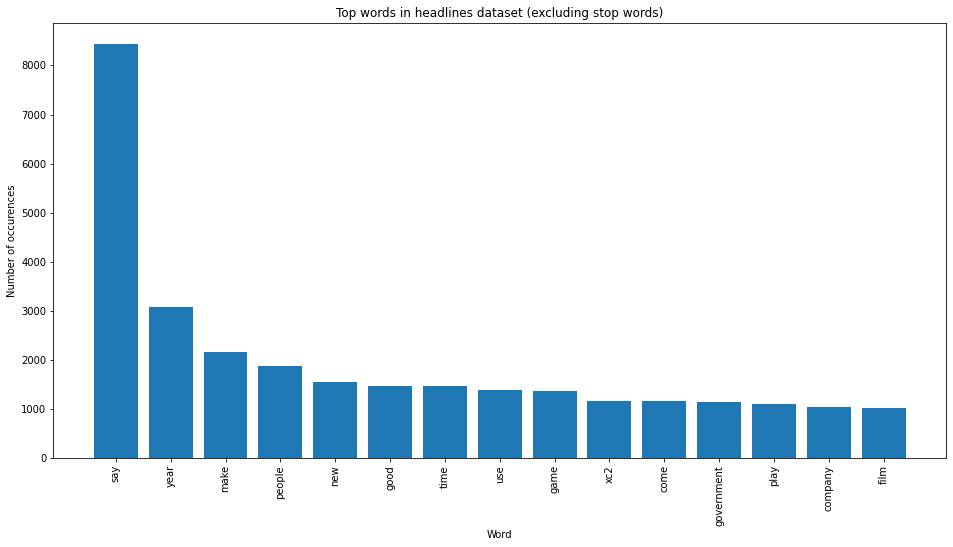

In [28]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [29]:
# creating new column lungth for length of news
df['length']=df['news'].apply(len)
df.head()

,news,type,length
0,net fingerprint combat attack neighty large ne...,tech,1645
1,progress new internet domain nby early net new...,tech,1101
2,peer peer net stay peer network stay verge exp...,tech,2737
3,tough rule ringtone seller nfirm rule ringtone...,tech,1893
4,ripe medium explosion set drive global medium ...,tech,2307


In [30]:
# Creating new column with number of words
df['word_count'] = df['news'].apply(lambda x: len(str(x).split(" ")))
df.head()

,news,type,length,word_count
0,net fingerprint combat attack neighty large ne...,tech,1645,234
1,progress new internet domain nby early net new...,tech,1101,156
2,peer peer net stay peer network stay verge exp...,tech,2737,398
3,tough rule ringtone seller nfirm rule ringtone...,tech,1893,286
4,ripe medium explosion set drive global medium ...,tech,2307,309


In [31]:
# Creating new dataframes with different news type
bbc_tech = df[df['type'] == 'tech']
bbc_sport = df[df['type'] == 'sport']
bbc_business = df[df['type'] == 'business']
bbc_entertainment = df[df['type'] == 'entertainment']
bbc_politics = df[df['type'] == 'politics']


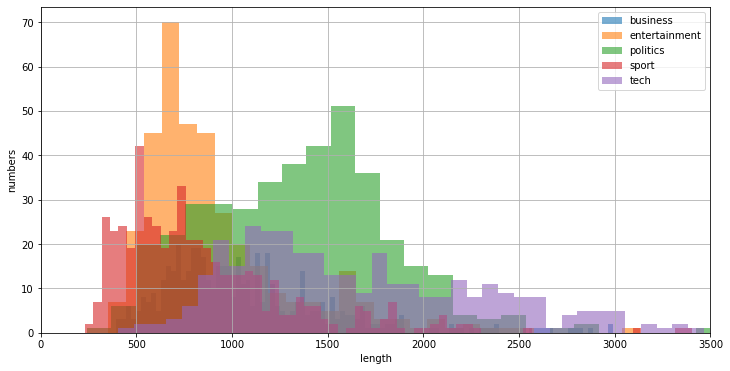

In [32]:
# creating histogram to see the length of words in different types of news
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc_business['length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc_entertainment['length'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc_politics['length'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc_sport['length'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc_tech['length'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,3500)
plt.grid()
plt.show()

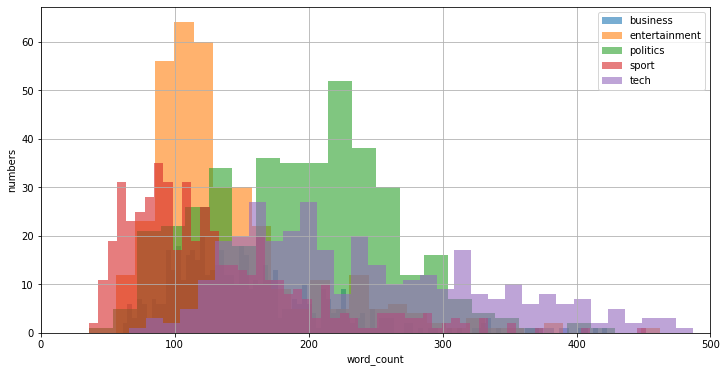

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc_business['word_count'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc_entertainment['word_count'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc_politics['word_count'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc_sport['word_count'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc_tech['word_count'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('word_count')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

## **Latent Semantic Allocation**

In [34]:
# creating new dataframe for LSA
lsa_df = pd.DataFrame({'Heading' : df['type'],'News': df['news']})

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook

In [39]:
stopword_list = stopwords.words('english')
dtm = CountVectorizer(max_df=0.7, min_df=5, token_pattern="[a-z']+", 
                      stop_words=stopword_list, max_features=2000) # Only top 2000 most frequently ocurring words are considered
dtm.fit(lsa_df['News'])
dtm_mat = dtm.transform(lsa_df['News'])

In [40]:
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(dtm_mat)
tsvd_mat = tsvd.transform(dtm_mat)

In [41]:
s_list = []

for clus in tqdm(range(2,21)):

    km = KMeans(n_clusters=clus, n_init=50, max_iter=1000) # Instantiate KMeans clustering

    km.fit(tsvd_mat) # Run KMeans clustering

    s = silhouette_score(tsvd_mat, km.labels_)

    s_list.append(s)

100%|██████████| 19/19 [01:56<00:00,  6.15s/it]


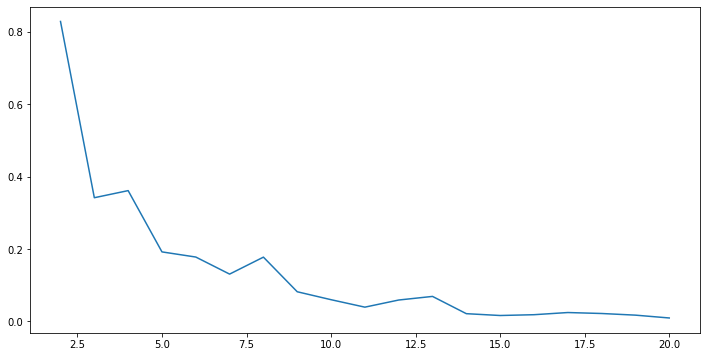

In [42]:
plt.plot(range(2,21), s_list)

plt.show()

The plot shows clearly that the silhouette scores are quite low. Thus, either the clusters are not linearly separable or there is a considerable amount of overlaps among them. A TSNE plot is better suited in such a case. The TSNE plot extracts a low dimensional representation of high dimensional data through a non-linear embedding method which tries to retain the local structure of the data. The code as well as the TSNE plot is shown below.

In [43]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

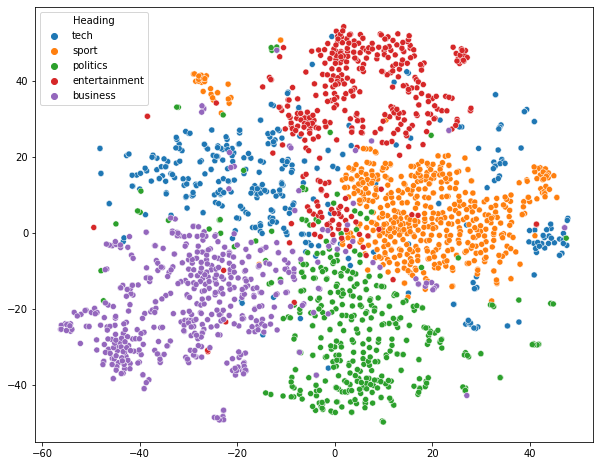

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=lsa_df['Heading'])

In this plot, only the tech-related news article looks like having a much wider spread whereas other news articles look quite nicely clustered. It also suggests that LSA (or Truncated SVD) has done a good job on the textual data to extract 200 important dimensions to segregate news articles on different topics. It is to be understood that TSNE is non-deterministic in nature and multiple runs will produce multiple representations, even though, the structure will be more likely to remain similar if not the same. This LSA can be also used for text queries, for example

#**<b>Latent Dirichlet Allocation</b>**

### LDA is a generative probabilistic process, designed with the specific goal of uncovering latent topic structure in text corpora.

In [45]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000,min_df=0.05)

In [46]:
matrix=vectorizer.fit_transform(df['news'])

In [47]:
df1 = pd.DataFrame(matrix.todense() , columns=vectorizer.get_feature_names())

In [48]:
model=LatentDirichletAllocation(n_components=5)
lda_topic_matrix=model.fit_transform(matrix)

In [49]:
doc = pd.DataFrame(model.transform(matrix))

In [50]:
doc.columns=['topic1','topic2','topic3','topic4','topic5']

In [51]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [52]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [54]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2127 samples in 0.006s...
[t-SNE] Computed neighbors for 2127 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2127
[t-SNE] Computed conditional probabilities for sample 2000 / 2127
[t-SNE] Computed conditional probabilities for sample 2127 / 2127
[t-SNE] Mean sigma: 0.003715
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.811695
[t-SNE] KL divergence after 2000 iterations: 0.215058


In [55]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [56]:
lda_panel = pyLDAvis.sklearn.prepare(model,matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  30.652901
2       51.163364 -159.968018       2        1  24.933794
0      -73.144554   21.523815       3        1  24.124455
1      -66.410133 -110.606438       4        1  14.241519
3       54.417324   12.443444       5        1   6.047331, topic_info=        Term        Freq       Total Category  logprob  loglift
166     film  103.000000  103.000000  Default  30.0000  30.0000
36     award   57.000000   57.000000  Default  29.0000  29.0000
193     good   73.000000   73.000000  Default  28.0000  28.0000
442     star   38.000000   38.000000  Default  27.0000  27.0000
87   company   61.000000   61.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
57   british    5.615281   32.730166   Topic5  -4.9315   1.0427
476      top    6.199715   42.618123   Topic5  -4.8324   0.8778
512     year    8.134918  107.216830   Topic5  -4.5608   0.2269
460     take    7.035655   69.343656   Topic5  -4.7060   0.5175
19      also    7.254295   76.794116   Topic5  -4.6754   0.4460

[250 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         2  0.245192   access
2         3  0.674277   access
2         4  0.061298   access
4         1  0.057654  account
4         2  0.172961  account
...     ...       ...      ...
512       1  0.363749     year
512       2  0.167884     year
512       3  0.233172     year
512       4  0.167884     year
512       5  0.074615     year

[714 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 2, 4])

CONCLUSTION

The above outcome shows how correctly LSA could extract the most relevant document. However, as mentioned earlier, there are other word vectors available that can produce more interesting results but, when dealing with relatively smaller data, LSA-based document vector creation can be quite helpful.